<a href="https://colab.research.google.com/github/Mk-yl/Machine-Learning-/blob/main/MachineLeaning/TP1_classification_champignons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [24]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [19]:
my_dataframe = pd.read_csv('champignons.csv', dtype={'id_champignons': int})
my_dataframe

print(my_dataframe['toxicite'].value_counts())

print(my_dataframe.isnull().sum())


toxicite
comestible    4208
toxique       3916
Name: count, dtype: int64
toxicite                   0
surface-chapeau            0
ecchymoses                 0
attache-lamelles           0
taille-lamelles            0
forme-pied                 0
surface-pied-sur-anneau    0
couleur-pied-sur-anneau    0
couleur-voile              0
type-anneau                0
population                 0
dtype: int64


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [25]:

encoded_dataframe = pd.get_dummies(my_dataframe, drop_first=False)

print("Taille des données après encodage (lignes x colonnes) :")
print(encoded_dataframe.shape)

print("\nNoms des colonnes générées :")
print(encoded_dataframe.columns.tolist())

Taille des données après encodage (lignes x colonnes) :
(8124, 42)

Noms des colonnes générées :
['toxicite_comestible', 'toxicite_toxique', 'surface-chapeau_fibreuse', 'surface-chapeau_lisse', 'surface-chapeau_rainurée', 'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent', 'attache-lamelles_libre', 'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé', 'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse', 'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse', 'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc', 'couleur-voile_brun', 'couleur-voile_jaune', 'couleur-voile_orange', 'type-anneau_aucun', 'type-anne

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

In [30]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(my_dataframe)
encoded_columns = encoder.get_feature_names_out(my_dataframe.columns)
encoded_dataframe = pd.DataFrame(encoded_array, columns=encoded_columns)

In [31]:
# Mélanger les données
encoded_dataframe = shuffle(encoded_dataframe, random_state=42)

# Afficher le résultat
encoded_dataframe.head(), encoded_dataframe.shape



(      toxicite_comestible  toxicite_toxique  surface-chapeau_fibreuse  \
 1971                  1.0               0.0                       1.0   
 6654                  0.0               1.0                       0.0   
 5606                  0.0               1.0                       0.0   
 3332                  1.0               0.0                       0.0   
 6988                  0.0               1.0                       0.0   
 
       surface-chapeau_lisse  surface-chapeau_rainurée  \
 1971                    0.0                       0.0   
 6654                    1.0                       0.0   
 5606                    0.0                       0.0   
 3332                    0.0                       0.0   
 6988                    1.0                       0.0   
 
       surface-chapeau_écaillée  ecchymoses_non  ecchymoses_oui  \
 1971                       0.0             1.0             0.0   
 6654                       0.0             1.0             0.0   
 56

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
labels = encoded_dataframe['toxicite_toxique']
features = encoded_dataframe.drop(['toxicite_toxique', 'toxicite_comestible'], axis=1)

In [34]:
#
X_train, X_dev, y_train, y_dev = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

# Afficher les dimensions des jeux de données
X_train.shape, y_train.shape, X_dev.shape, y_dev.shape


((5686, 40), (5686,), (2438, 40), (2438,))

## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

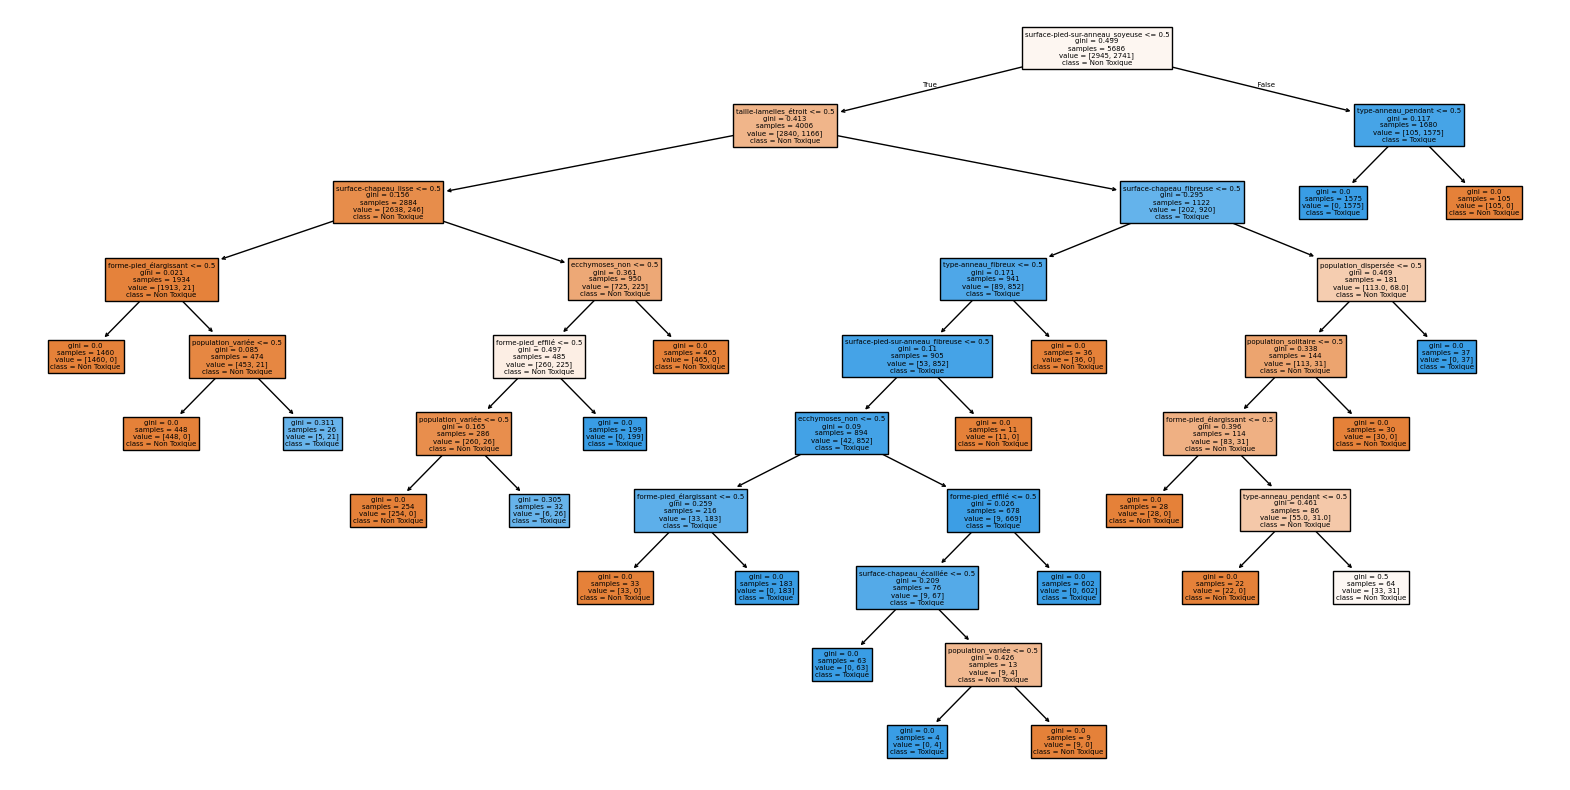

In [37]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Afficher l'arbre
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=["Non Toxique", "Toxique"], filled=True)
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source


In [39]:
# Exporter l'arbre au format DOT pour Graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Non Toxique", "Toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

In [40]:
# Afficher l'arbre avec Graphviz
graph = Source(dot_data)
graph.render("decision_tree")  # Sauvegarder en tant que fichier .pdf (optionnel)
graph.view()  # Afficher l'arbre directement



'decision_tree.pdf'

2.3 Mesurer la précision du modèle sur les données de dev

In [ ]:
from sklearn.metrics import accuracy_score


In [41]:
# Calculer la précision
y_pred = clf.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred)

# Afficher la précision
print(f"Précision du modèle sur les données de développement : {accuracy:.2f}")


Précision du modèle sur les données de développement : 0.99


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [42]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

# Afficher les informations du modèle
print(f"Random Forest entraînée avec {rf_clf.n_estimators} arbres et une profondeur maximale de {rf_clf.max_depth}.")


Random Forest entraînée avec 500 arbres et une profondeur maximale de 6.


3.2 Afficher trois arbres au hasard.

In [44]:
from random import randint

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
indices = [randint(0, 499) for _ in range(3)]


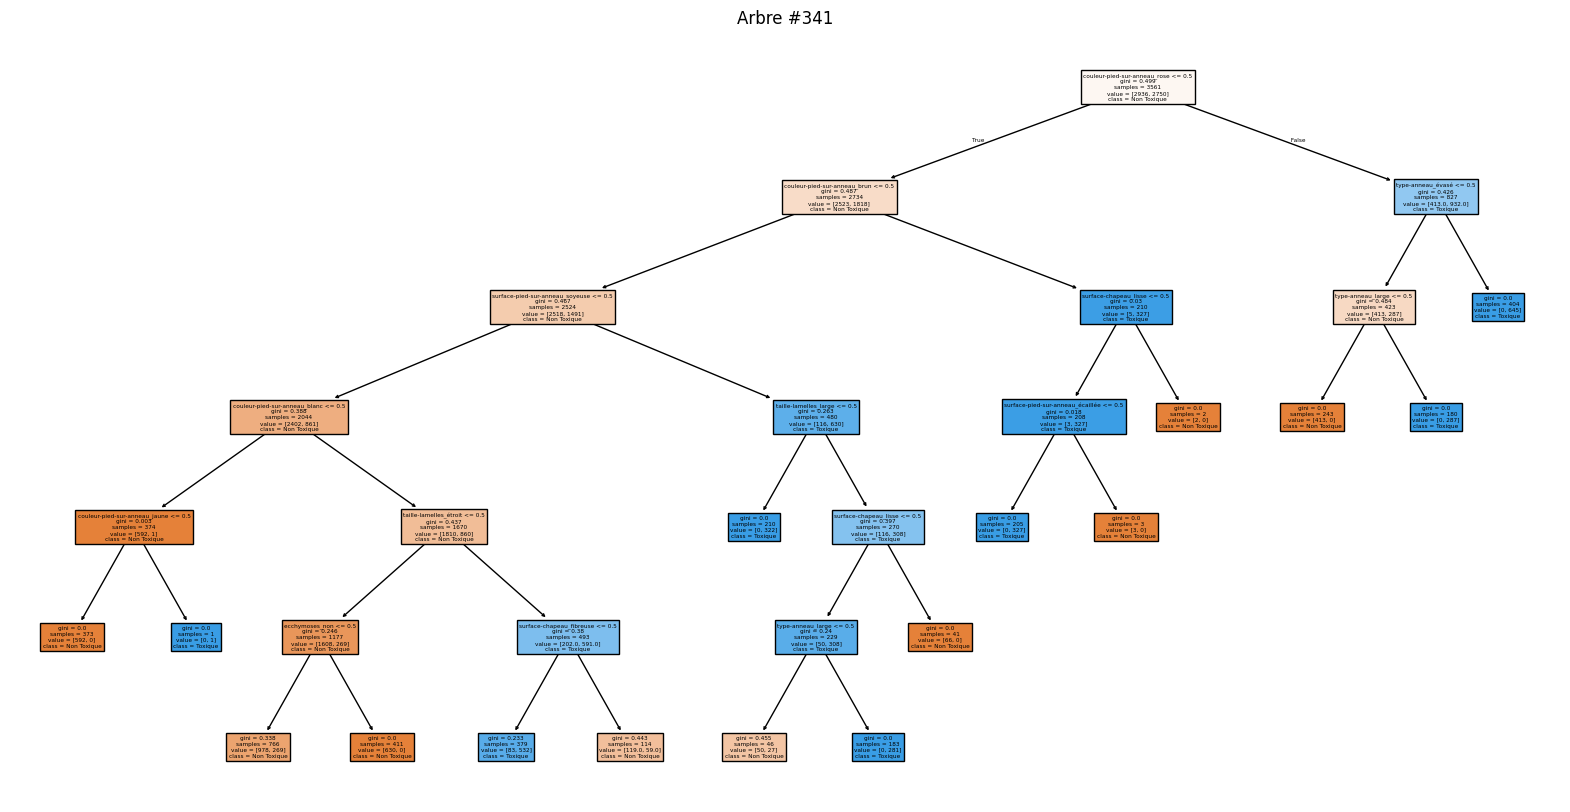

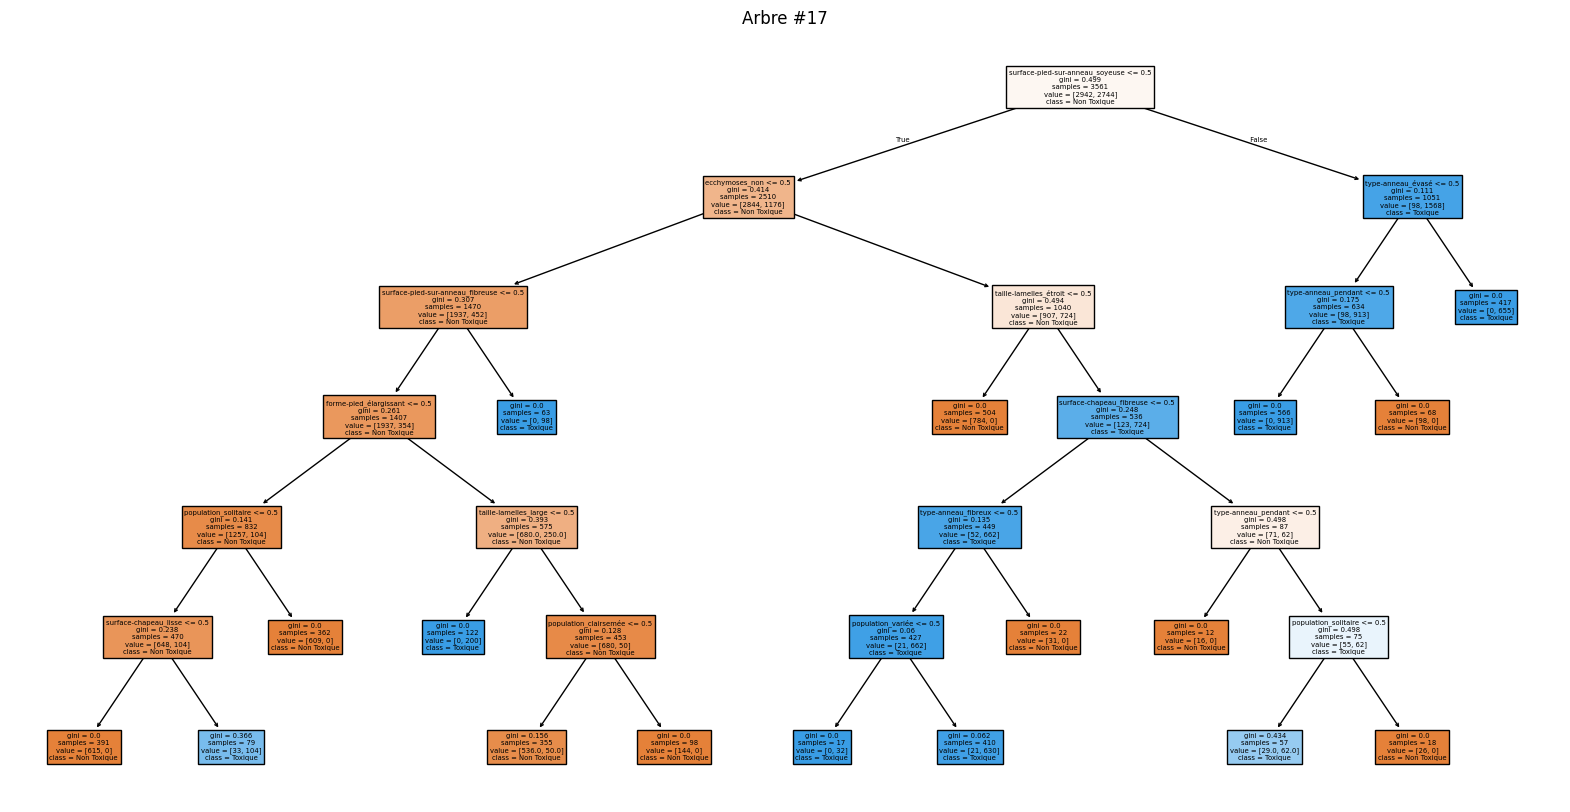

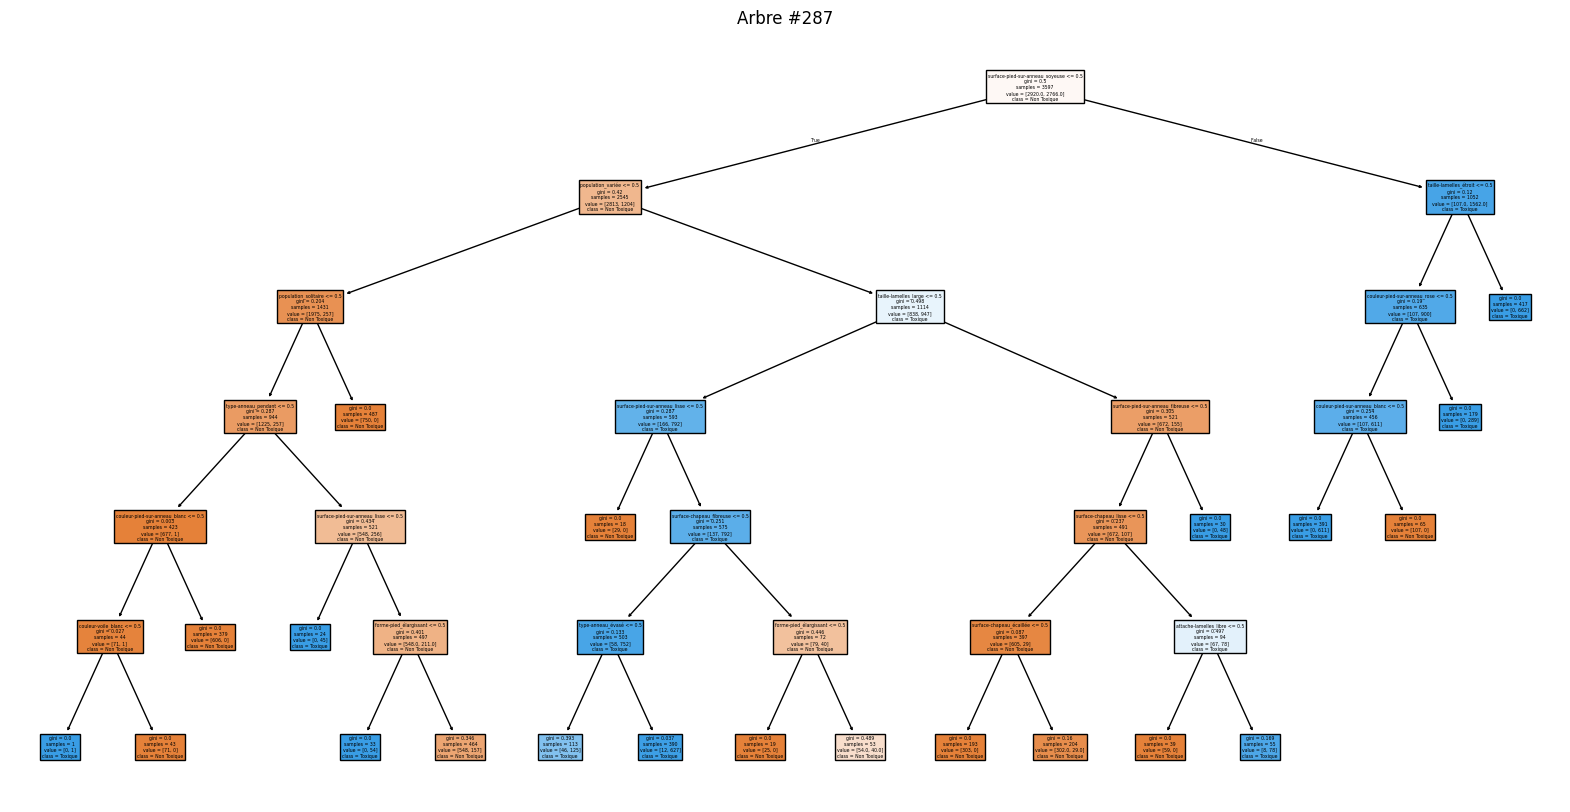

In [45]:
# Afficher les trois arbres sélectionnés
for i, idx in enumerate(indices):
    plt.figure(figsize=(20, 10))
    plot_tree(rf_clf.estimators_[idx],
              feature_names=X_train.columns,
              class_names=["Non Toxique", "Toxique"],
              filled=True)
    plt.title(f"Arbre #{idx}")
    plt.show()

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [47]:


# Calculer la précision
y_pred_rf = rf_clf.predict(X_dev)
accuracy_rf = accuracy_score(y_dev, y_pred_rf)

# Afficher la précision
print(f"Précision du modèle Random Forest sur les données de développement : {accuracy_rf:.2f}")


Précision du modèle Random Forest sur les données de développement : 0.96


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les execices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?